# A model for predicting heart diesease trained using Tensorflow  

## Importing Libraries 

    ~ Tensorflow for training, estimating and outsourcing
    ~ Pandas for dataset managing 
    ~ numpy for array related stuffs
    ~ matplotlib for plotting dataset values
    

In [430]:
import time

start_time = time.time()

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

end_time = time.time()

print (end_time - start_time)

8.893013000488281e-05


## Importing our datasaet
    ~ Our dataset is in csv format. So importing it as pandas dataframe

In [431]:
%%bash
ls

heart.csv
Heart DIsease Prediction TF.ipynb
heart-disease-uci.zip


In [432]:
df = pd.read_csv('heart.csv')

## Exploring our dataset 

In [433]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [434]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [435]:
pos = df[df.target == 1]
neg = df[df.target == 0]

## Visualizing the dataset 

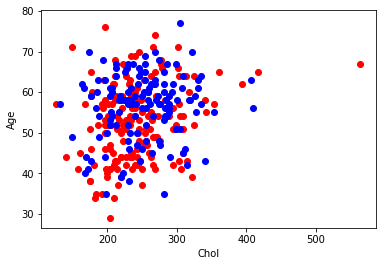

In [436]:
plt.scatter(pos.chol, pos.age, color = 'red')
plt.scatter(neg.chol, neg.age, color = 'blue')
plt.xlabel('Chol')
plt.ylabel('Age')
plt.show()

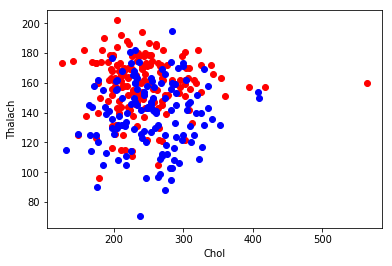

In [437]:
plt.scatter(pos.chol, pos.thalach, color = 'red')
plt.scatter(neg.chol, neg.thalach, color = 'blue')
plt.xlabel('Chol')
plt.ylabel('Thalach')
plt.show()

## Split the dataset into train and test dataset 

In [474]:
from sklearn.model_selection import train_test_split

df.sample(frac = 1).reset_index(drop = True)

label = df.target

features = df.drop('target', axis = 1)

features = (features - features.mean())/(features.max() - features.min())

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 101)

In [439]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Importing SVM 

In [440]:
from sklearn import svm

classifier = svm.SVC(gamma= 'scale')

In [441]:
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [443]:
print("Test accuracy {}".format(classifier.score(x_test, y_test) * 100))

Test accuracy 86.88524590163934


## Using Tensorflow 

### Creating Feature Columns 

In [596]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [597]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [598]:
df = (df - df.min())/(df.max() - df.min())

In [599]:
age = tf.feature_column.numeric_column('age')

sex = tf.feature_column.numeric_column('sex')

cp = tf.feature_column.numeric_column('cp')

trestbps = tf.feature_column.numeric_column('trestbps')

chol = tf.feature_column.numeric_column('chol')

fbs = tf.feature_column.numeric_column('fbs')

restecg = tf.feature_column.numeric_column('restecg')

thalach = tf.feature_column.numeric_column('thalach')

exang = tf.feature_column.numeric_column('exang')

oldpeak = tf.feature_column.numeric_column('oldpeak')

slope = tf.feature_column.numeric_column('slope')

ca = tf.feature_column.numeric_column('ca')

thal = tf.feature_column.numeric_column('thal')

In [600]:
feature_column = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, thal]

### Splitting the dataset 

In [601]:
label = df.target

features = df.drop(columns= 'target')

In [602]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 101)

### Defining Input Functions 

In [603]:
input_fn = tf.estimator.inputs.pandas_input_fn(x= x_train,
                                               y = y_train,
                                               batch_size= 10,
                                               num_epochs= 1000,
                                               shuffle= True)

### Instantiating Classifier 

In [604]:
model_dir = 'Model_dir'

In [605]:
%%bash

rm -rf Model_dir

In [606]:
tf_classifier = tf.estimator.LinearClassifier(feature_columns= feature_column, model_dir= model_dir, n_classes= 2, optimizer= 'Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'Model_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b68d458d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [607]:
tf_classifier.train(input_fn= input_fn, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into Model_dir/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 393.685
INFO:tensorflow:loss = 3.4626684, step = 101 (0.256 sec)
INFO:tensorflow:global_step/sec: 632.123
INFO:tensorflow:loss = 5.1790586, step = 201 (0.158 sec)
INFO:tensorflow:global_step/sec: 511.986
INFO:tensorflow:loss = 15.870015, step = 301 (0.197 sec)
INFO:tensorflow:global_step/sec: 540.794
INFO:tensorflow:loss = 3.0788336, step = 401 (0.183 sec)
INFO:tensorflow:global_step/sec: 516.775
INFO:tensorflow:loss = 3.0863156, step = 501 (0.193 sec)
INFO:tensorflow:global_step/sec: 489.349
INFO:tensorflow:loss = 1.8775467, step = 601 (0.205 sec)
INFO:tensorflow:global_step/sec: 491.313
INFO:tensorflow:loss = 4

### Input function for Testing 

In [620]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x = x_test, y= y_test, num_epochs=1, batch_size=10, shuffle= False)

In [621]:
metrics = tf_classifier.evaluate(input_fn = eval_input_fn)
print('RMSE on dataset = {}'.format(np.sqrt(metrics['average_loss'])))

INFO:tensorflow:Could not find trained model in model_dir: Model_dir, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-23-12:34:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-23-12:34:01
INFO:tensorflow:Saving dict for global step 0: accuracy = 0.5081967, accuracy_baseline = 0.5081967, auc = 0.49999997, auc_precision_recall = 0.7459016, average_loss = 0.6931472, global_step = 0, label/mean = 0.4918033, loss = 6.0402827, precision = 0.0, prediction/mean = 0.5, recall = 0.0
RMSE on dataset = 0.8325546383857727
